# County-level Material Stock Analysis USA

## Load packages

In [90]:
require(moments)
require(sf)
require(dplyr)
require(cartogram)
require(factoextra)
require(viridis)
require(IRdisplay)

Loading required package: moments



## Paths

In [9]:
dcsv  <- "../csv/"
dshp  <- "../shp"
dplot <- "dorling-county"

## Read data

In [99]:
sf <- st_read(sprintf("%s/county_proj.shp", dshp))

stats <- read.csv(sprintf("%s/stats-all-counties/area_pop_per_county.csv", dcsv))

stock_street <- read.csv(sprintf("%s/mass_per_county/mass_street_total.tif.txt", dcsv), sep = ";")
colnames(stock_street) <- c("ID", "street")

stock_rail <- read.csv(sprintf("%s/mass_per_county/mass_rail_total.tif.txt", dcsv), sep = ";")
colnames(stock_rail) <- c("ID", "rail")

stock_other <- read.csv(sprintf("%s/mass_per_county/mass_other_total.tif.txt", dcsv), sep = ";")
colnames(stock_other) <- c("ID", "other")

stock_building <- read.csv(sprintf("%s/mass_per_county/mass_building_total.tif.txt", dcsv), sep = ";")
colnames(stock_building) <- c("ID", "building")

Reading layer `county_proj' from data source `/home/frantzda/mat_stocks/paper/USA/shp/county_proj.shp' using driver `ESRI Shapefile'
Simple feature collection with 3103 features and 4 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -2361108 ymin: 263345.3 xmax: 2263358 ymax: 3177733
proj4string:    +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 


## Prepare data

- join shapefile with all tables
- compute total stock
- compute population density
- compute building to infrastructure ratio
- compute stocks per area and per capita

In [100]:
sf <- sf %>%
        inner_join(stats, by = "ID") %>%
        inner_join(stock_street, by = "ID") %>%
        inner_join(stock_rail, by = "ID") %>%
        inner_join(stock_other, by = "ID") %>%
        inner_join(stock_building, by = "ID")

sf <- sf %>%
        mutate(total = street + rail + other + building)

sf <- sf %>%
        mutate(POP_PER_KM2 = POPESTIMATE2018 / AREA_KM2)

sf <- sf %>%
        mutate(ratio = building / (street + rail + other) * 100)

sf_area <- sf %>% mutate_at(c(11:14, 16), funs(. / AREA_KM2))
sf_pop  <- sf %>% mutate_at(c(11:14, 16), funs(. / POPESTIMATE2018))

## Histograms

Histograms per capita

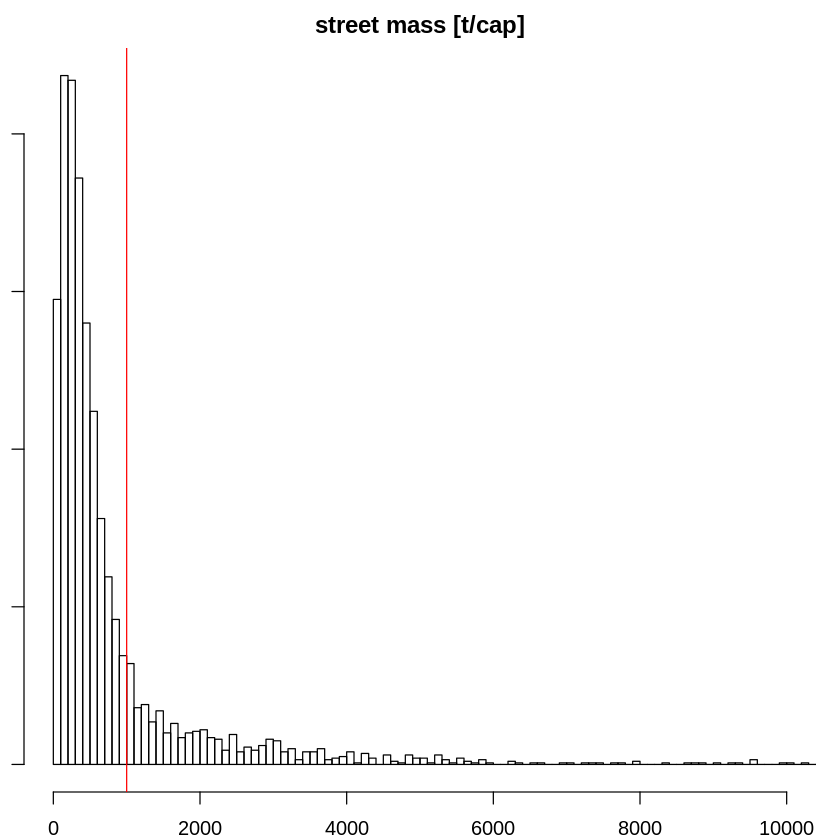

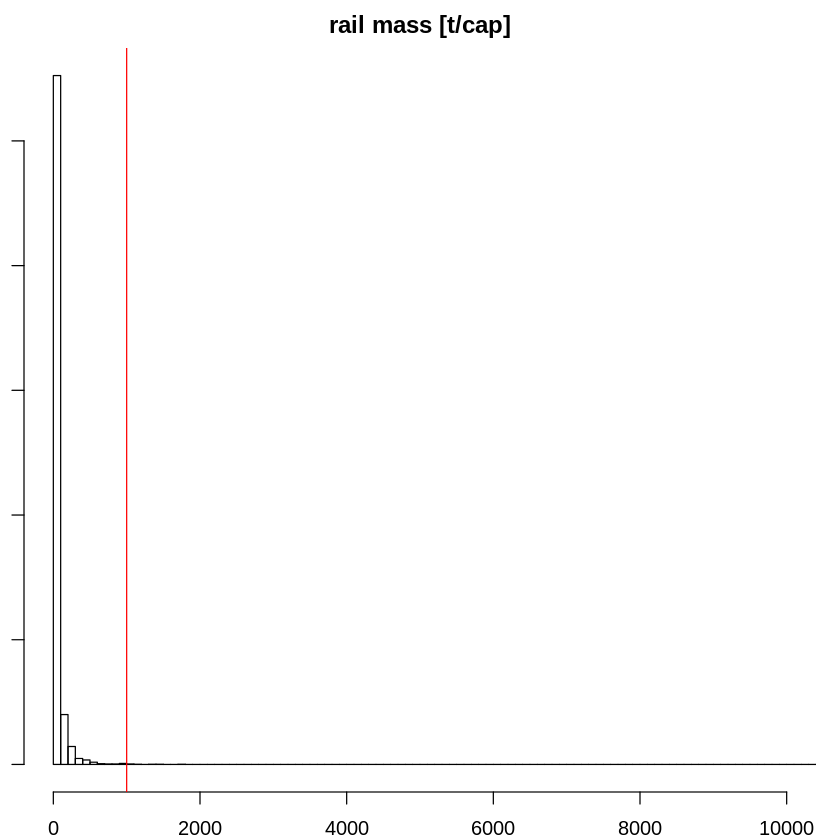

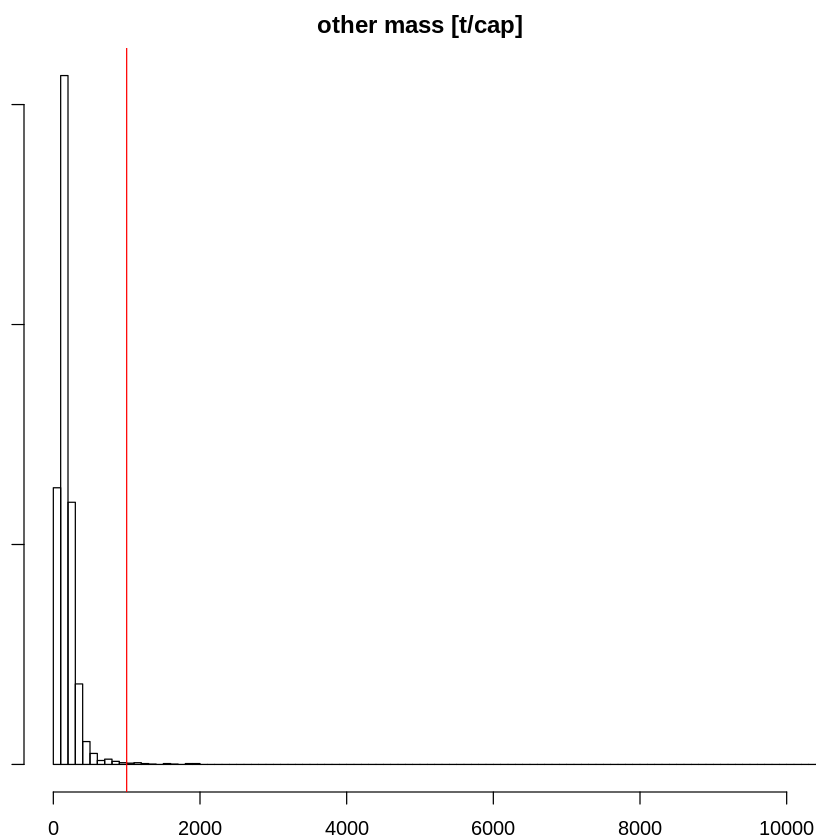

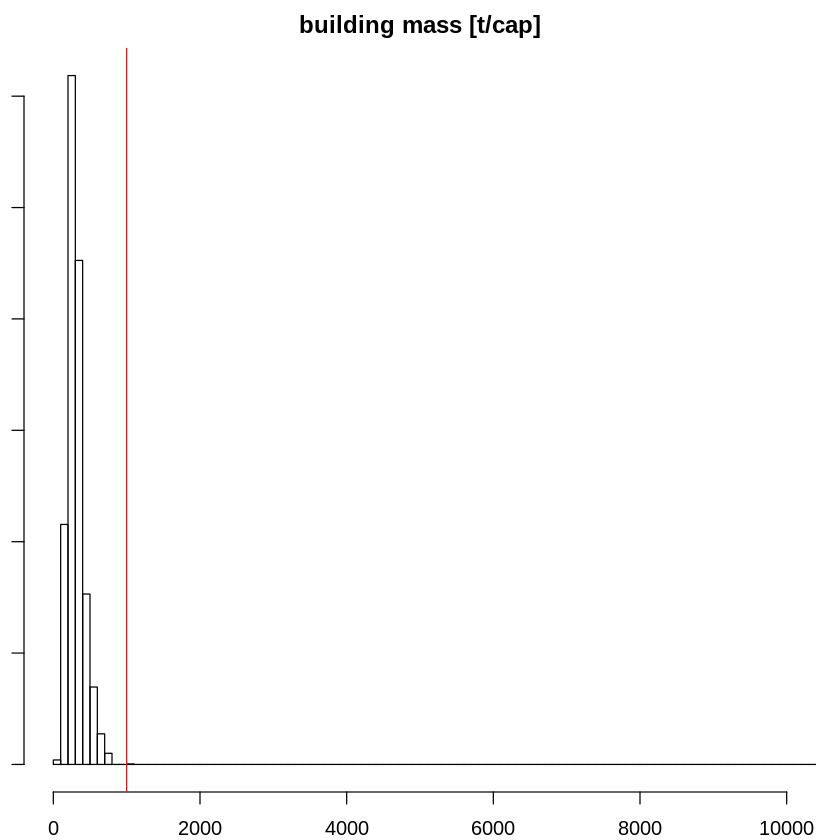

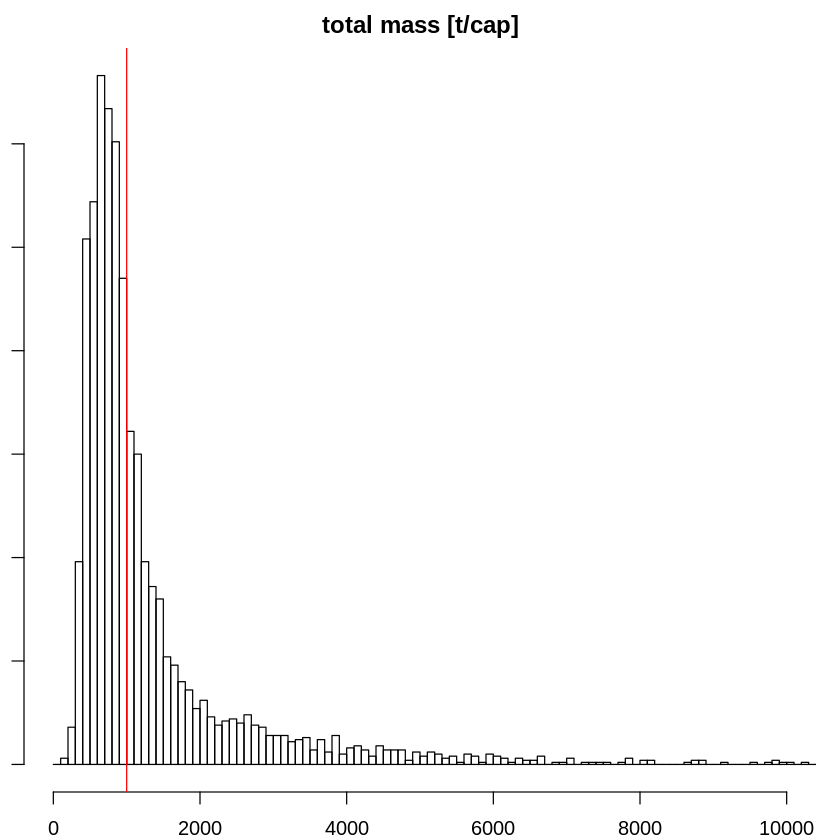

In [121]:
for (name in c("street", "rail", "other", "building", "total")){

    mai  <- c(0.4, 0.2, 0.4, 0.2)

    sf_ <- sf_pop
    title <- sprintf("%s mass [t/cap]", name)

    par(mai = mai, cex = 1)

    hist(
        st_drop_geometry(sf_)[name] %>% unlist(), 
        xlim = c(0, 10000),
        main = title,
        breaks = seq(0, 1e5, 1e2))
    
    abline(v = 1000, col = 2)

}

population density of counties with more than 1000 t/cap (street)

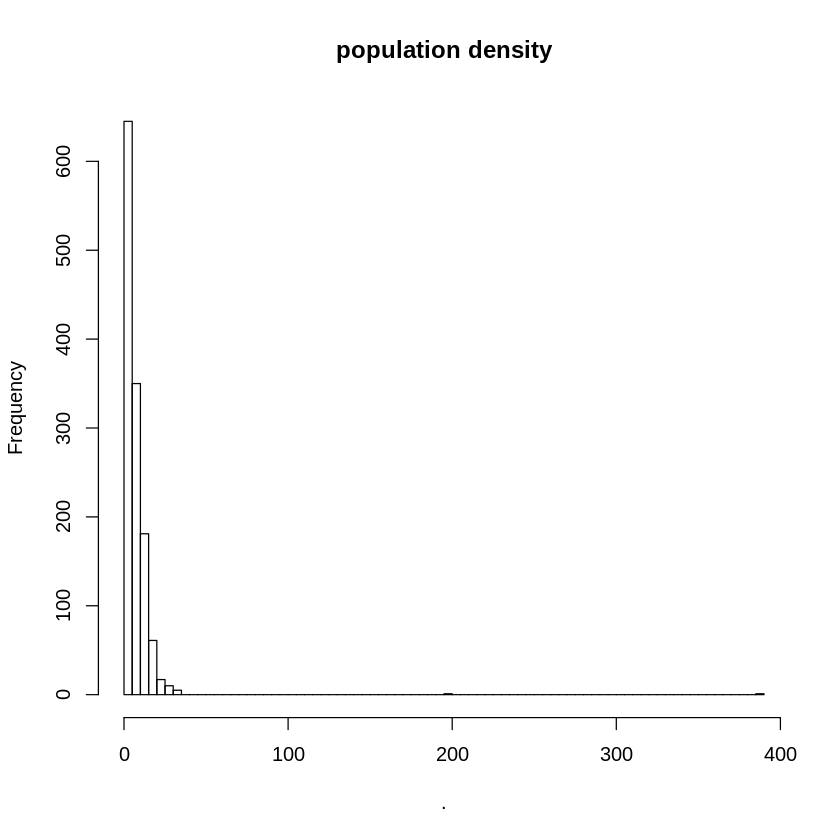

In [135]:
st_drop_geometry(sf_pop) %>% 
filter(total > 1000) %>%
select(POP_PER_KM2) %>%
unlist() %>%
hist(breaks=100, main = "population density")

population density vs street stock / cap

log-log plot

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2 y values <= 0 omitted from logarithmic plot”


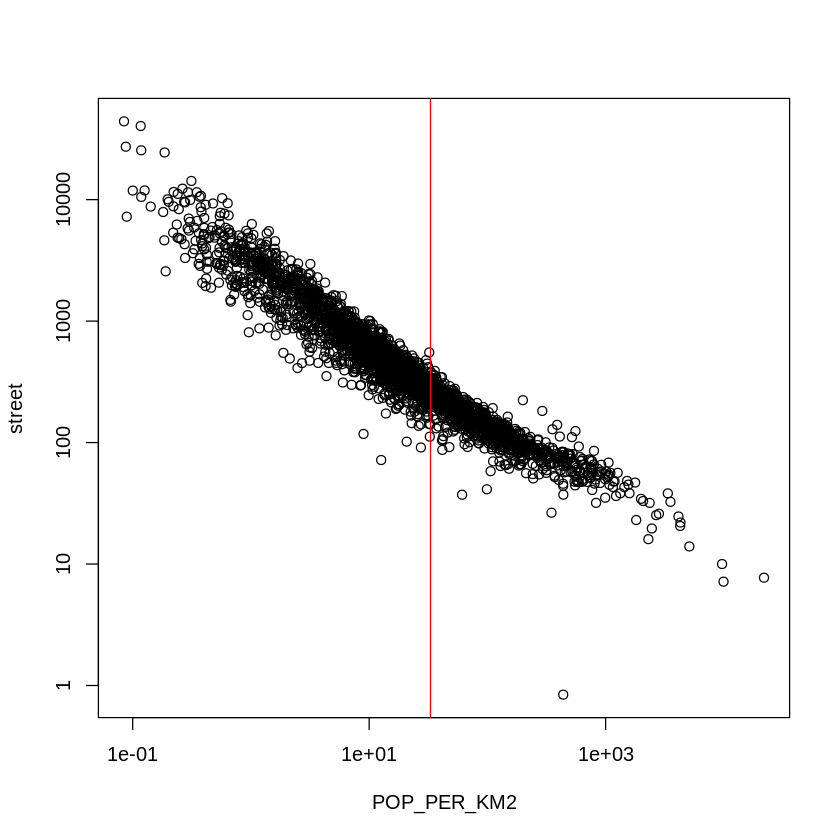

In [148]:
st_drop_geometry(sf_pop) %>% 
#filter(total > 1000) %>%
select(POP_PER_KM2, street) %>%
plot(log = "xy")
abline(v = 33, col = 2) # mean population density in USA

In [131]:
st_drop_geometry(sf_pop) %>% 
filter(NAME_1.x == "New York")


HASC_2.x ID   NAME_1.x NAME_2.x       X    HASC_2.y NAME_1.y NAME_2.y      
1  US.NY.AB 1948 New York Albany         1946 US.NY.AB New York Albany        
2  US.NY.AL 1949 New York Allegany       1947 US.NY.AL New York Allegany      
3  US.NY.BN 1950 New York Bronx          1948 US.NY.BN New York Bronx         
4  US.NY.BO 1951 New York Broome         1949 US.NY.BO New York Broome        
5  US.NY.CD 1952 New York Cortland       1950 US.NY.CD New York Cortland      
6  US.NY.CG 1953 New York Cattaraugus    1951 US.NY.CG New York Cattaraugus   
7  US.NY.CH 1954 New York Chenango       1952 US.NY.CH New York Chenango      
8  US.NY.CL 1955 New York Clinton        1953 US.NY.CL New York Clinton       
9  US.NY.CM 1956 New York Chemung        1954 US.NY.CM New York Chemung       
10 US.NY.CQ 1957 New York Chautauqua     1955 US.NY.CQ New York Chautauqua    
11 US.NY.CU 1958 New York Columbia       1956 US.NY.CU New York Columbia      
12 US.NY.CY 1959 New York Cayuga         1957 US.NY.CY New York Cayuga        
13 US.NY.DE 1960 New York Delaware       1958 US.NY.DE New York Delaware      
14 US.NY.DU 1961 New York Dutchess       1959 US.NY.DU New York Dutchess      
15 US.NY.ER 1962 New York Erie           1960 US.NY.ER New York Erie          
16 US.NY.ES 1963 New York Essex          1961 US.NY.ES New York Essex         
17 US.NY.FR 1964 New York Franklin       1962 US.NY.FR New York Franklin      
18 US.NY.FU 1965 New York Fulton         1963 US.NY.FU New York Fulton        
19 US.NY.GE 1966 New York Genesee        1964 US.NY.GE New York Genesee       
20 US.NY.GR 1967 New York Greene         1965 US.NY.GR New York Greene        
21 US.NY.HA 1968 New York Hamilton       1966 US.NY.HA New York Hamilton      
22 US.NY.HE 1969 New York Herkimer       1967 US.NY.HE New York Herkimer      
23 US.NY.JE 1970 New York Jefferson      1968 US.NY.JE New York Jefferson     
24 US.NY.KI 1971 New York Kings          1969 US.NY.KI New York Kings         
25 US.NY.LE 1972 New York Lewis          1970 US.NY.LE New York Lewis         
26 US.NY.LI 1973 New York Livingston     1971 US.NY.LI New York Livingston    
27 US.NY.MA 1974 New York Madison        1972 US.NY.MA New York Madison       
28 US.NY.MR 1975 New York Monroe         1973 US.NY.MR New York Monroe        
29 US.NY.MT 1976 New York Montgomery     1974 US.NY.MT New York Montgomery    
30 US.NY.NA 1977 New York Nassau         1975 US.NY.NA New York Nassau        
⋮  ⋮        ⋮    ⋮        ⋮              ⋮    ⋮        ⋮        ⋮             
33 US.NY.OD 1980 New York Oneida         1978 US.NY.OD New York Oneida        
34 US.NY.OE 1981 New York Orange         1979 US.NY.OE New York Orange        
35 US.NY.OG 1982 New York Onondaga       1980 US.NY.OG New York Onondaga      
36 US.NY.OL 1983 New York Orleans        1981 US.NY.OL New York Orleans       
37 US.NY.OO 1984 New York Otsego         1982 US.NY.OO New York Otsego        
38 US.NY.OR 1985 New York Ontario        1983 US.NY.OR New York Ontario       
39 US.NY.OS 1986 New York Oswego         1984 US.NY.OS New York Oswego        
40 US.NY.PU 1987 New York Putnam         1985 US.NY.PU New York Putnam        
41 US.NY.QU 1988 New York Queens         1986 US.NY.QU New York Queens        
42 US.NY.RE 1989 New York Rensselaer     1987 US.NY.RE New York Rensselaer    
43 US.NY.RI 1990 New York Richmond       1988 US.NY.RI New York Richmond      
44 US.NY.RO 1991 New York Rockland       1989 US.NY.RO New York Rockland      
45 US.NY.SC 1992 New York Seneca         1990 US.NY.SC New York Seneca        
46 US.NY.SF 1993 New York Suffolk        1991 US.NY.SF New York Suffolk       
47 US.NY.SI 1994 New York Saint Lawrence 1992 US.NY.SI New York Saint Lawrence
48 US.NY.SL 1995 New York Sullivan       1993 US.NY.SL New York Sullivan      
49 US.NY.SN 1996 New York Schenectady    1994 US.NY.SN New York Schenectady   
50 US.NY.SO 1997 New York Schoharie      1995 US.NY.SO New York Schoharie     
51 US.NY.SR 1998 New York Saratoga       1996 US.NY.S

## Dorling Plots

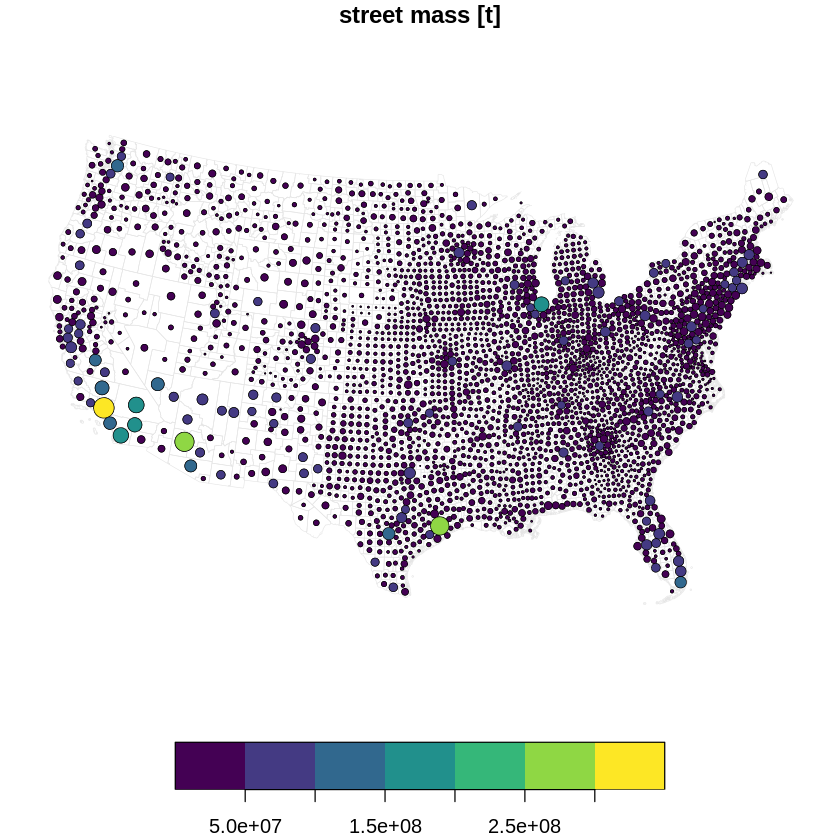

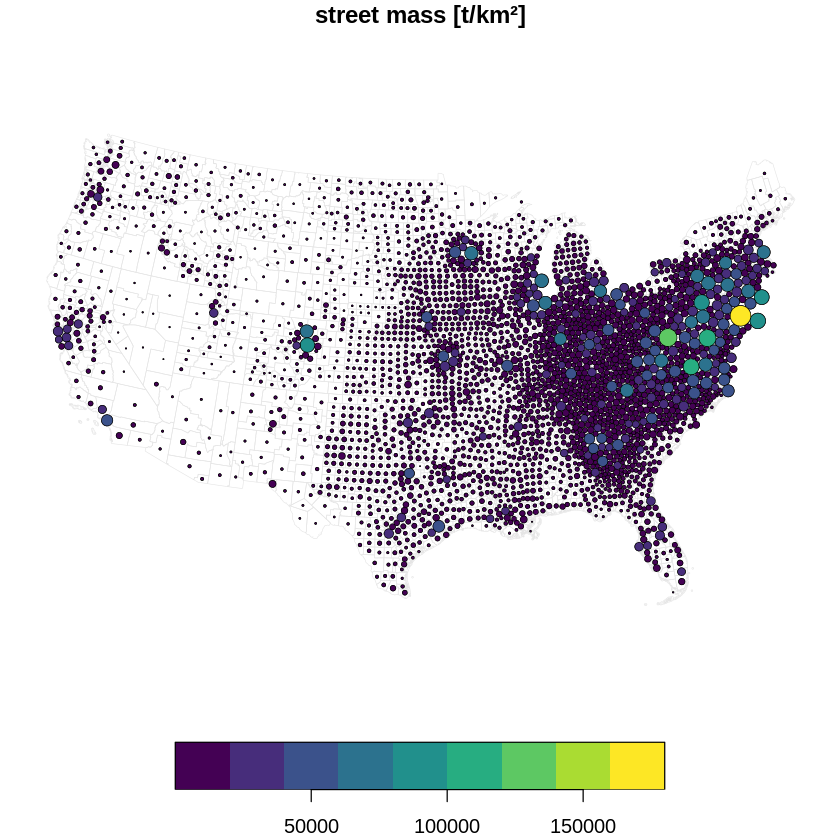

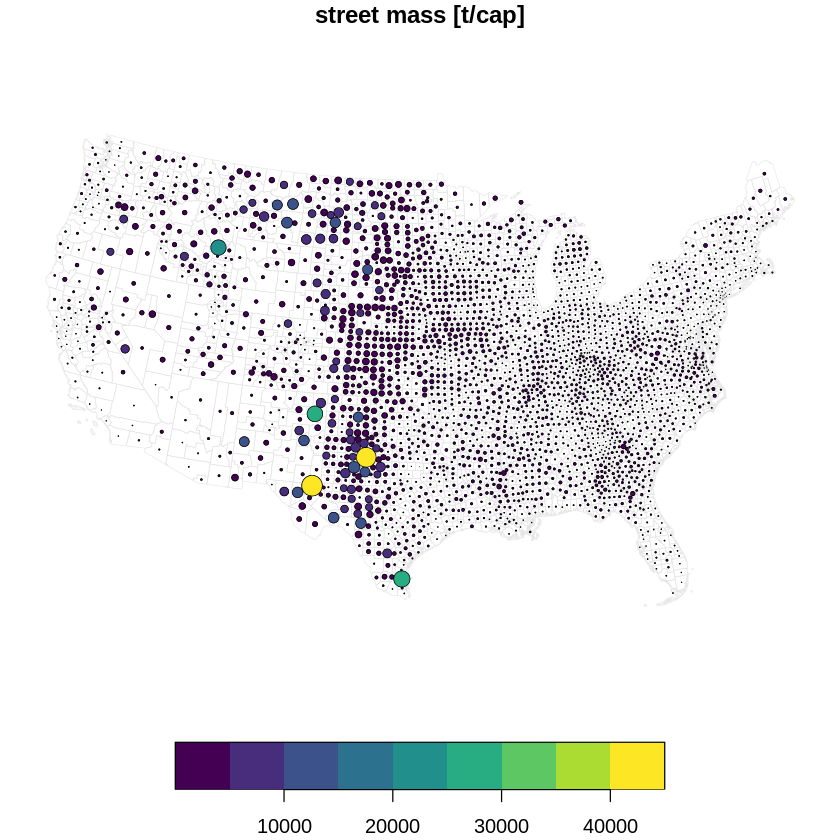

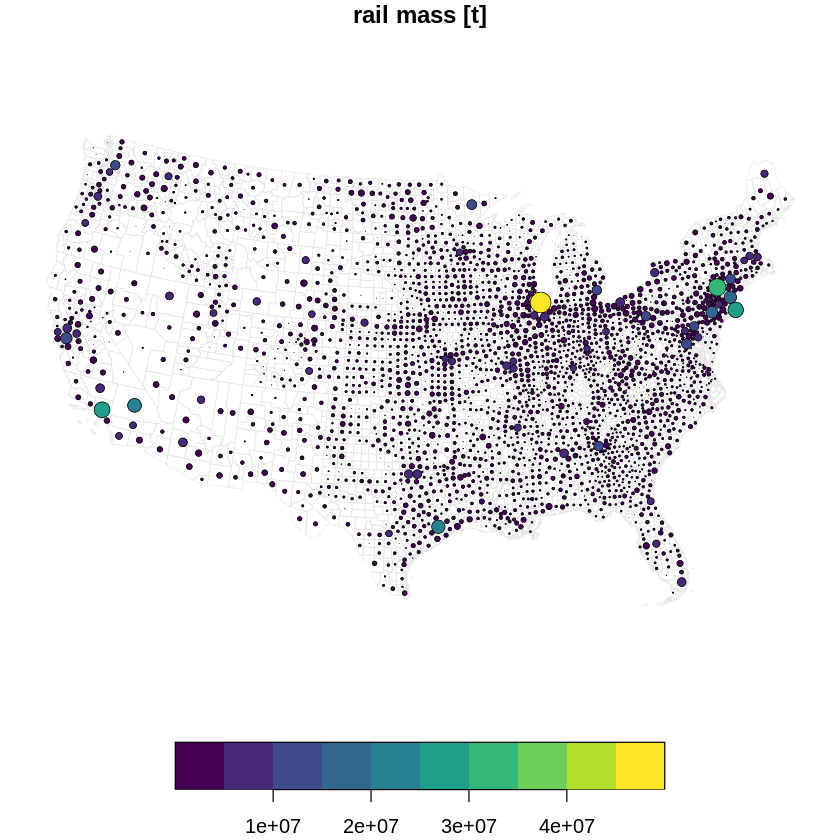

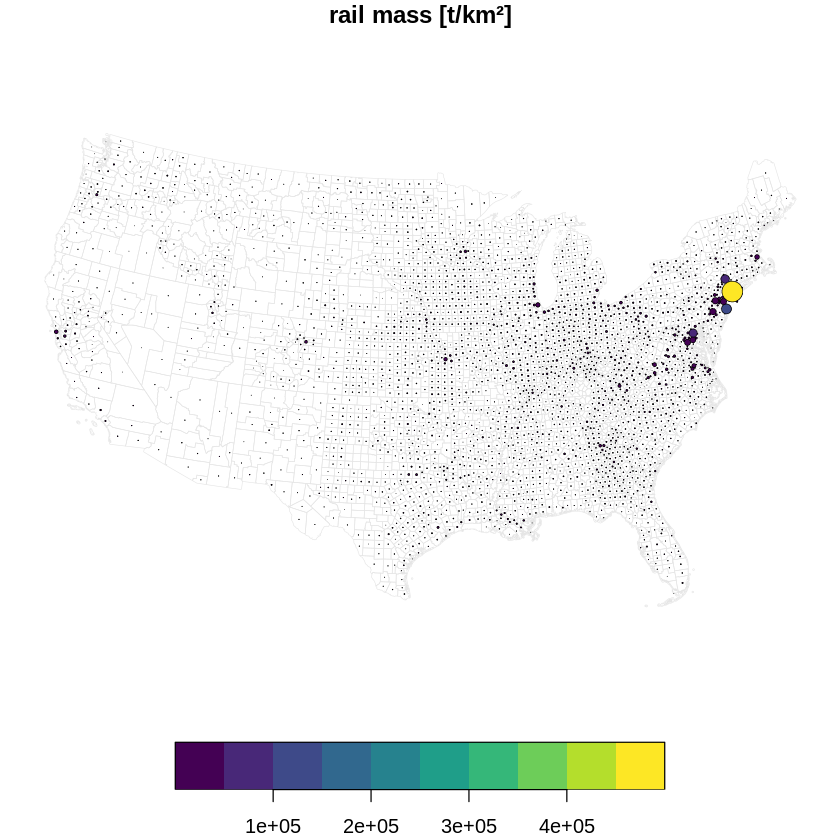

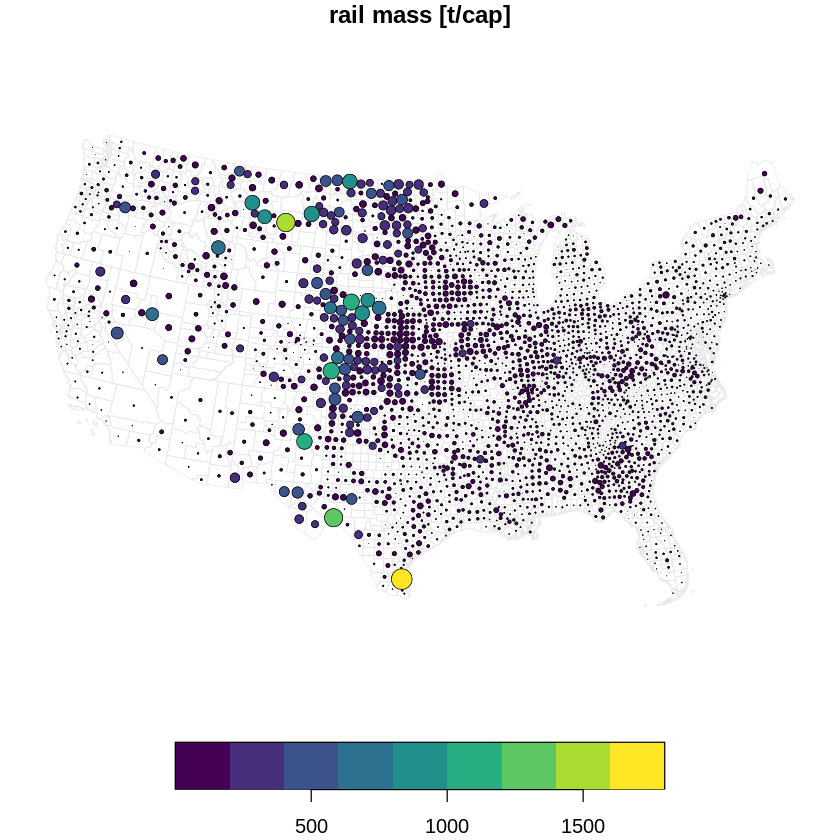

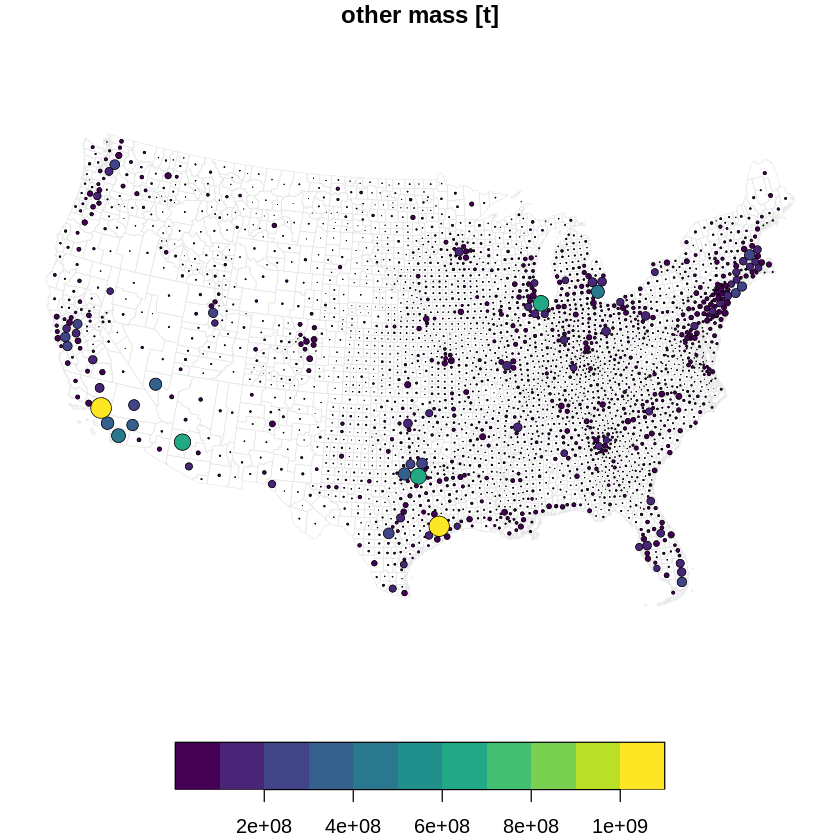

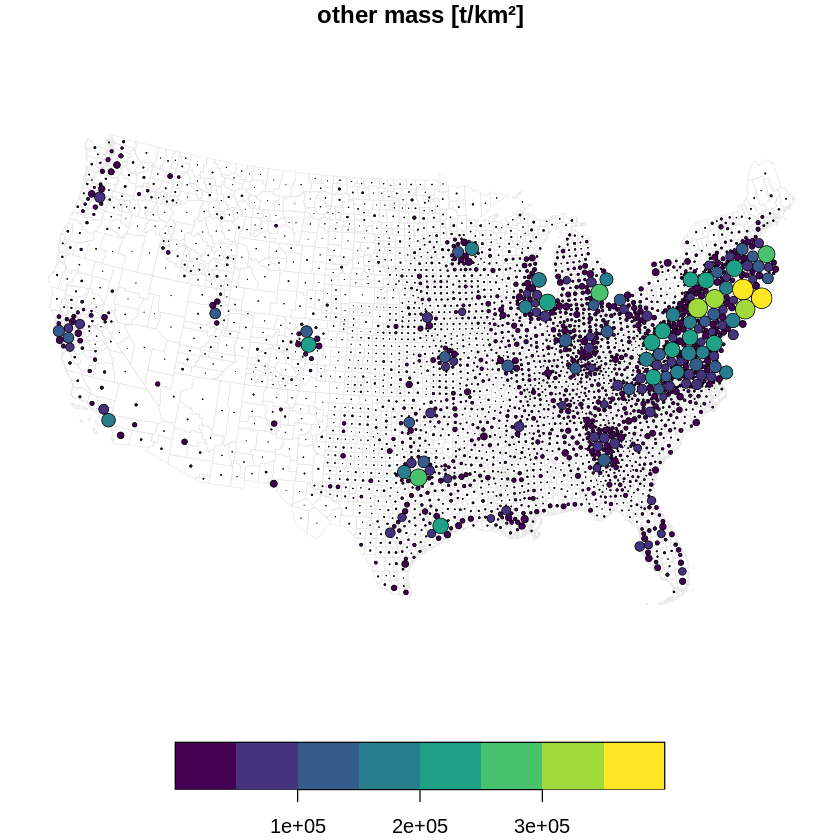

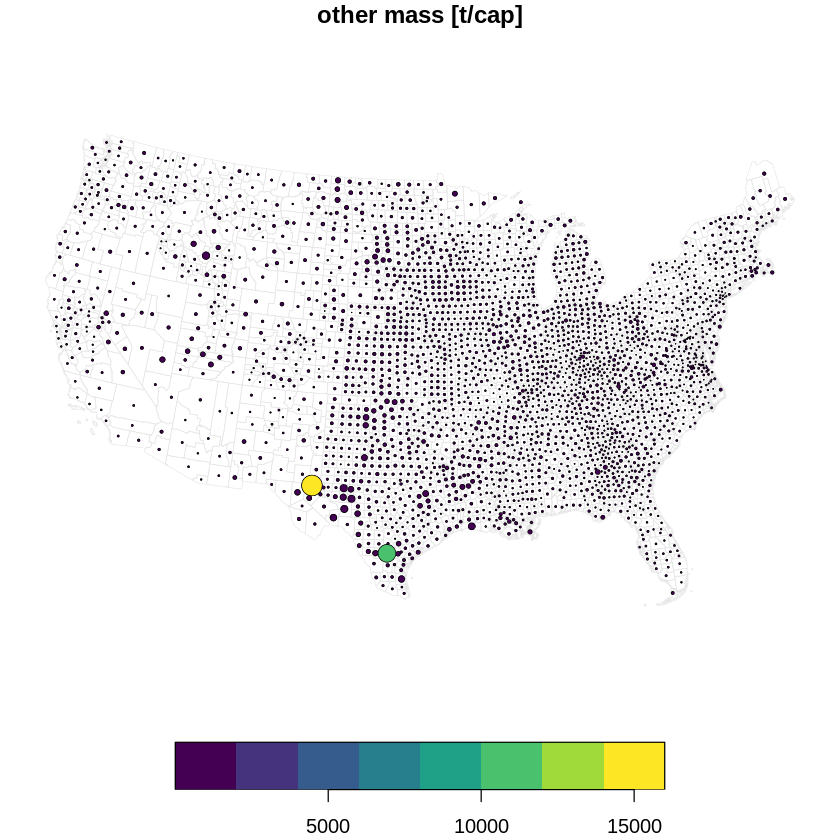

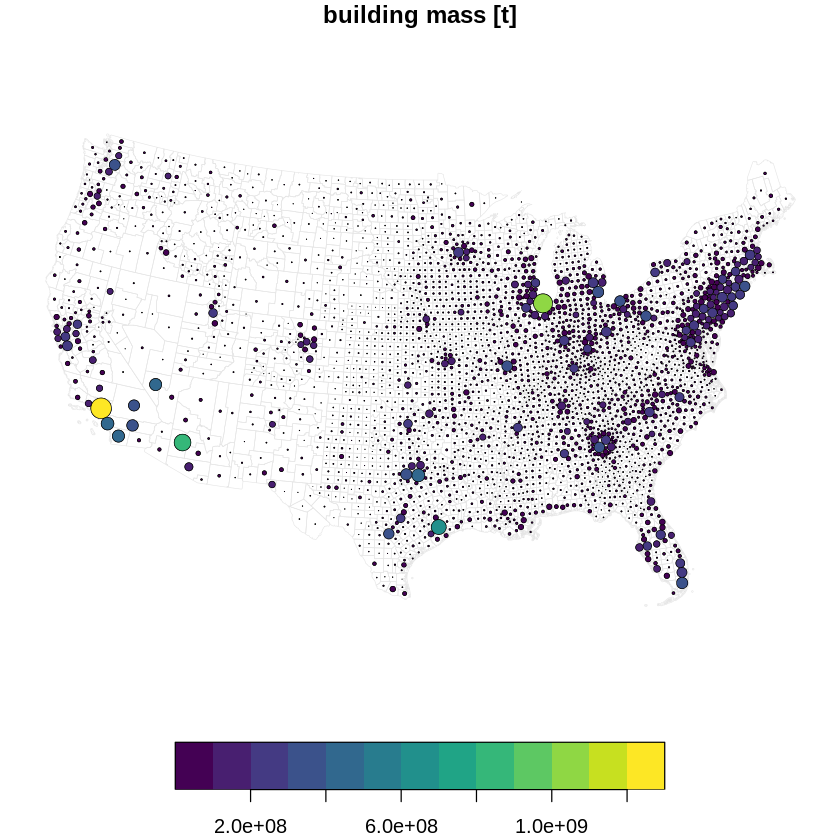

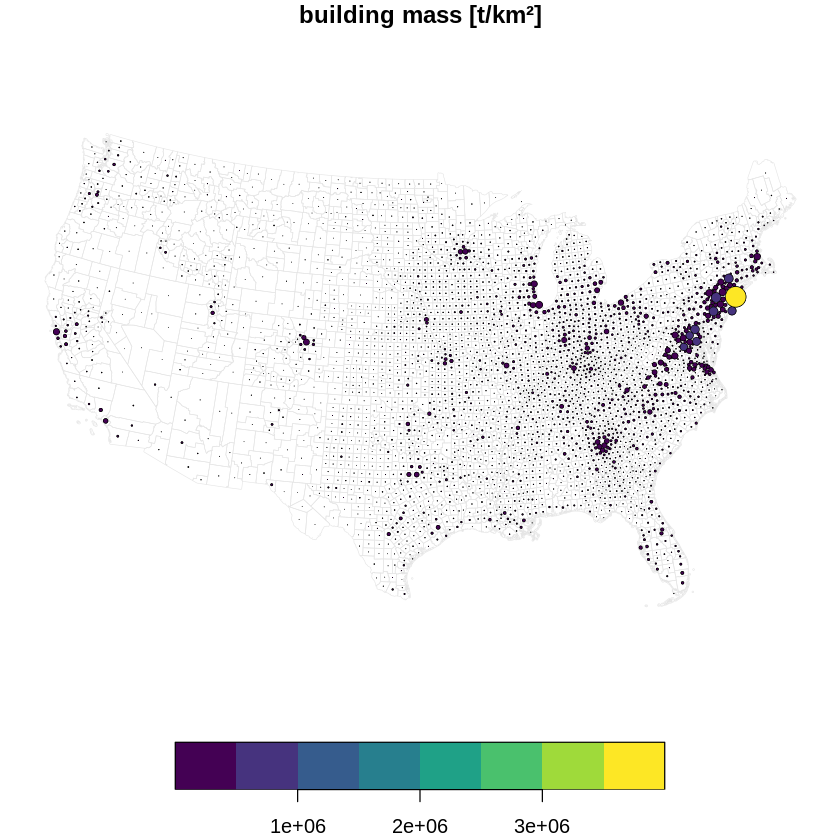

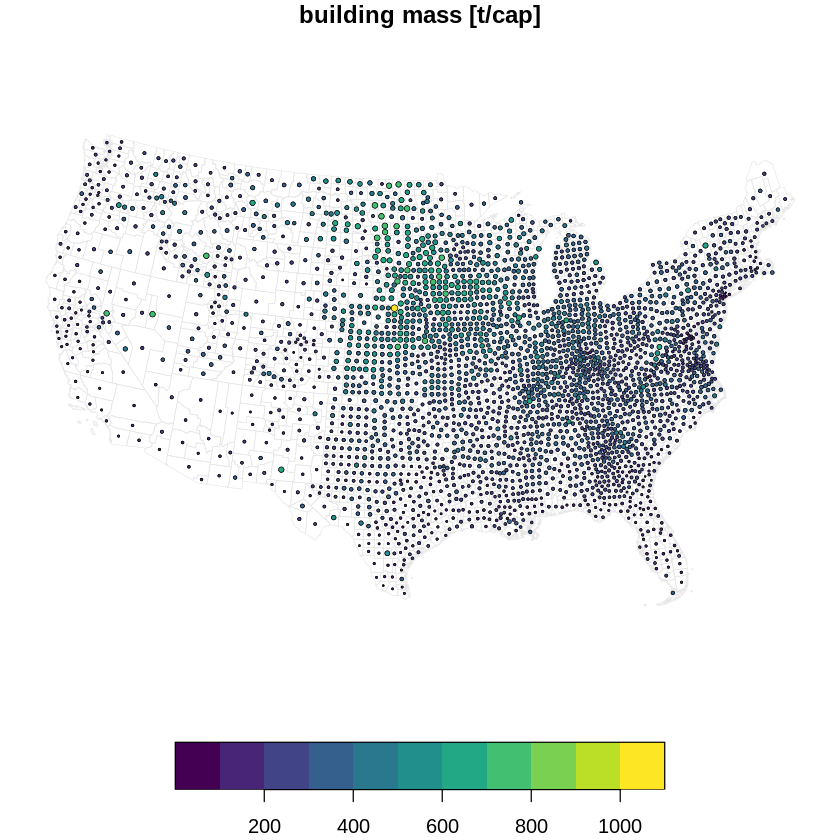

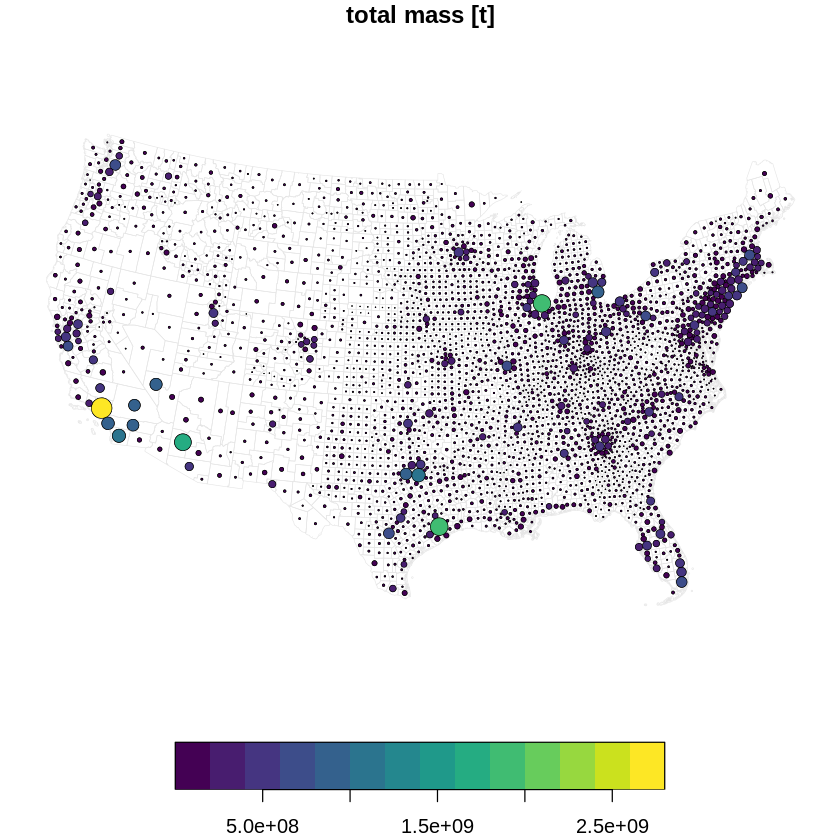

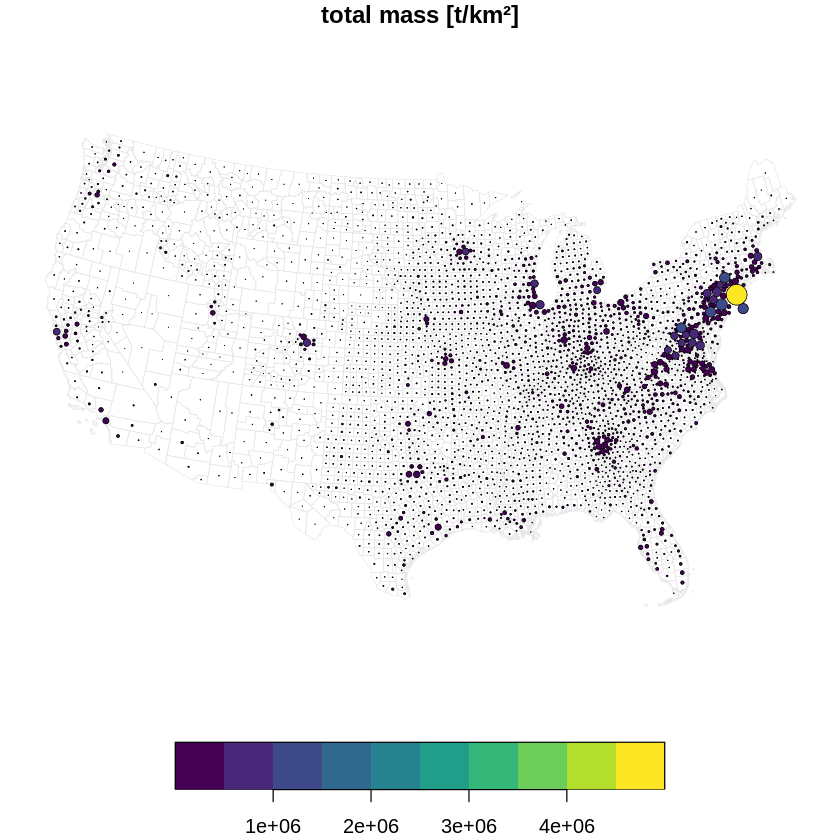

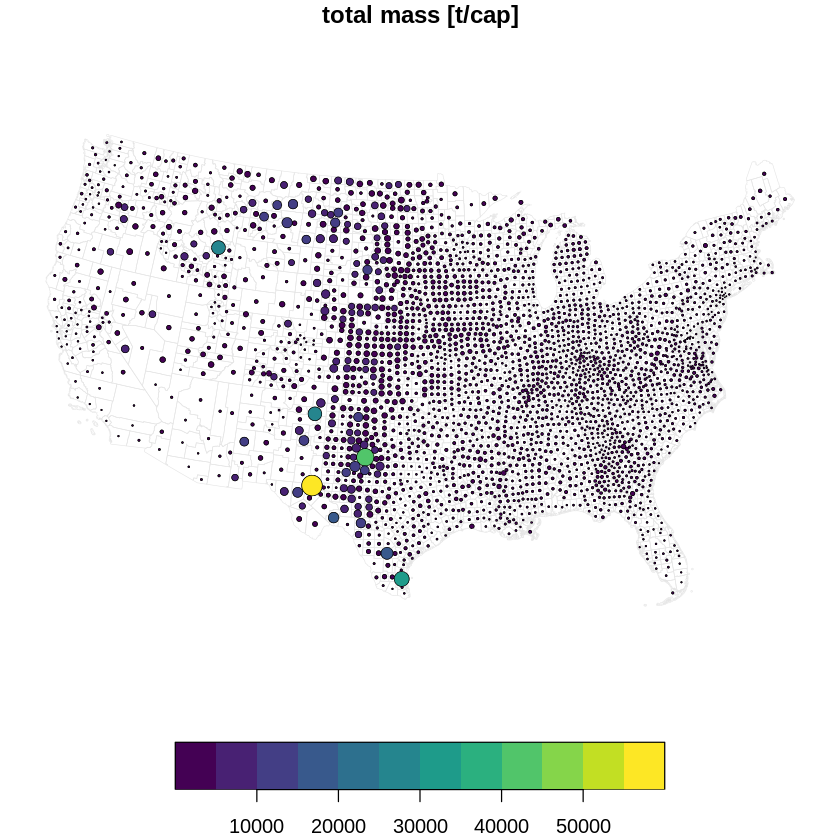

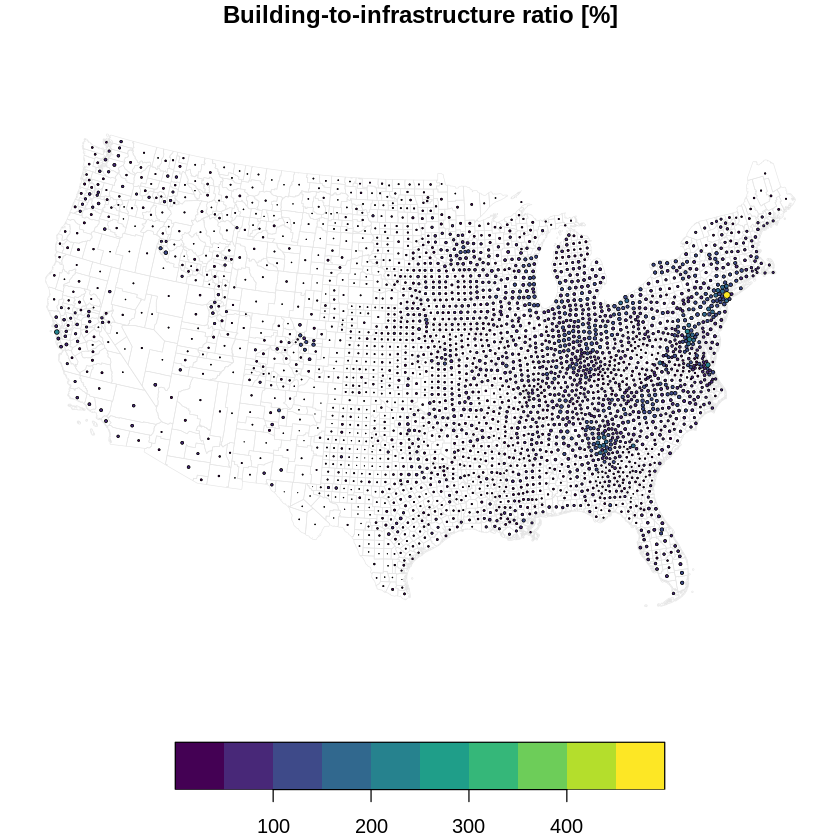

In [102]:
for (name in c("street", "rail", "other", "building", "total", "ratio")){

    mai  <- c(0.4, 0.2, 0.4, 0.2)
    
    imax <- if (name == "ratio") 1 else 3
    
    for (i in 1:imax){
        
        if (i == 1){
            sf_ <- sf
            title <- sprintf("%s mass [t]", name)
        } else if (i == 2){
            sf_ <- sf_area
            title <- sprintf("%s mass [t/km²]", name)
        } else if (i == 3){
            sf_ <- sf_pop
            title <- sprintf("%s mass [t/cap]", name)
        }

        if (name == "ratio"){
            title <- "Building-to-infrastructure ratio [%]"
        }

    #    tiff(file.path(dplot, sprintf("%s-tons-k%.1f.tif", name, k)),
    #    width = 8.8, height = 6, units = "cm", pointsize = 8,
    #    compression = "lzw", res = 600, type = "cairo", antialias = "subpixel")

        par(mai = mai, cex = 1)

            if (sf_ %>% 
                st_drop_geometry %>% 
                select(name) %>% 
                skewness() < 3) k <- 0.01 else k <- 0.1

            dor <- cartogram_dorling(sf_, name, k = k)
            plot(dor[name], pal = viridis, key.width = 0.15,
                main = title, reset = FALSE, lwd = 0.5)
            plot(st_geometry(sf_), border = "grey90", add = TRUE, lwd = 0.5)
            plot(dor[name], pal = viridis, add = TRUE, lwd = 0.5)

    #    dev.off()

    }

}

## Interpretation angles

### Rural Exodus

The per capita maps are well aligned with maps of depopulation, whereas this pattern is not visible in the per km² maps. Thus, stocks are still present, but used by fewer people - probably even some abandonment?

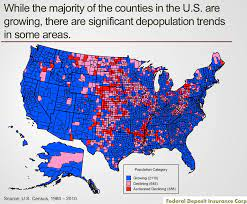
https://www.pbs.org/newshour/nation/rural-america-thing-past

# Statistical analysis

## Prepare data

- combine the tables
- select relevant variables

In [13]:
df <- st_drop_geometry(sf) %>%
        inner_join(
            st_drop_geometry(sf_area),
            by = "ID",
            suffix = c("", ".area")) %>%
        inner_join(
            st_drop_geometry(sf_pop),
            by = "ID",
            suffix = c("", ".pop"))  %>%
        select(
            starts_with(
                c("street.", "rail.", "other.", "building.", "total."),
                ignore.case = FALSE),
            BUILDING_RATIO)

## Correlation

street.area street.pop  rail.area   rail.pop    other.area 
street.area     1.00000000 -0.21054888  0.47543626 -0.19341597  0.87661668
street.pop     -0.21054888  1.00000000 -0.03529280  0.48713316 -0.14263114
rail.area       0.47543626 -0.03529280  1.00000000 -0.01761194  0.37501083
rail.pop       -0.19341597  0.48713316 -0.01761194  1.00000000 -0.12700009
other.area      0.87661668 -0.14263114  0.37501083 -0.12700009  1.00000000
other.pop      -0.07451371  0.49344463 -0.01779435  0.12608345 -0.02691747
building.area   0.74381852 -0.08834838  0.91968249 -0.07723235  0.65601274
building.pop   -0.21939896  0.27680628 -0.05970877  0.31085527 -0.21837290
total.area      0.84163956 -0.11499141  0.84145458 -0.10087625  0.79203780
total.pop      -0.21598839  0.98838838 -0.03758792  0.50766783 -0.14591093
BUILDING_RATIO  0.64984630 -0.42191244  0.28703889 -0.36724074  0.46630145
               other.pop   building.area building.pop total.area  total.pop  
street.area    -0.07451371  0.74381852   -0.21939896   0.84163956 -0.21598839
street.pop      0.49344463 -0.08834838    0.27680628  -0.11499141  0.98838838
rail.area      -0.01779435  0.91968249   -0.05970877   0.84145458 -0.03758792
rail.pop        0.12608345 -0.07723235    0.31085527  -0.10087625  0.50766783
other.area     -0.02691747  0.65601274   -0.21837290   0.79203780 -0.14591093
other.pop       1.00000000 -0.03633920    0.09328895  -0.03907682  0.60464850
building.area  -0.03633920  1.00000000   -0.12650242   0.97977570 -0.09309073
building.pop    0.09328895 -0.12650242    1.00000000  -0.16194265  0.32321153
total.area     -0.03907682  0.97977570   -0.16194265   1.00000000 -0.11968451
total.pop       0.60464850 -0.09309073    0.32321153  -0.11968451  1.00000000
BUILDING_RATIO -0.17995896  0.47603672   -0.14198588   0.51591211 -0.42127147
               BUILDING_RATIO
street.area     0.6498463    
street.pop     -0.4219124    
rail.area       0.2870389    
rail.pop       -0.3672407    
other.area      0.4663015    
other.pop      -0.1799590    
building.area   0.4760367    
building.pop   -0.1419859    
total.area      0.5159121    
total.pop      -0.4212715    
BUILDING_RATIO  1.0000000

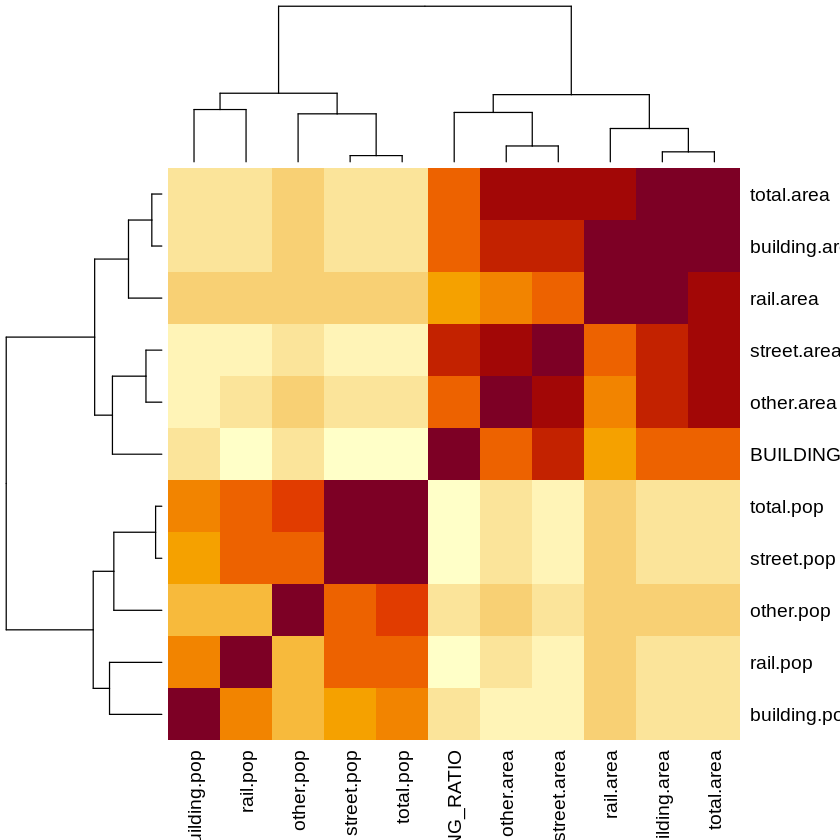

In [17]:
cor_df <- df %>% cor()

#    tiff(file.path(dplot, sprintf("correlation.tif")),
#    width = 8.8, height = 6, units = "cm", pointsize = 8,
#    compression = "lzw", res = 600, type = "cairo", antialias = "subpixel")

    par(mai = mai, cex = 1)

    heatmap(cor_df, scale = "none")

#    dev.off()

cor_df

## Principal Component Analysis

In [18]:
pca <- prcomp(df, scale = TRUE)

Eigenvalues: Percentage of variances explained by each PC
npc: Number of PCs that explain more than 95% of the variance

PC1      PC2      PC3      PC4       PC5       PC6      
Standard deviation     2.163966 1.645305 1.028542 0.9152186 0.8685177 0.6570684
Proportion of Variance 0.425700 0.246090 0.096170 0.0761500 0.0685700 0.0392500
Cumulative Proportion  0.425700 0.671800 0.767970 0.8441200 0.9126900 0.9519400
                       PC7       PC8       PC9       PC10         PC11        
Standard deviation     0.6506293 0.2954657 0.1342283 1.779178e-15 1.286166e-15
Proportion of Variance 0.0384800 0.0079400 0.0016400 0.000000e+00 0.000000e+00
Cumulative Proportion  0.9904300 0.9983600 1.0000000 1.000000e+00 1.000000e+00

[1] 6

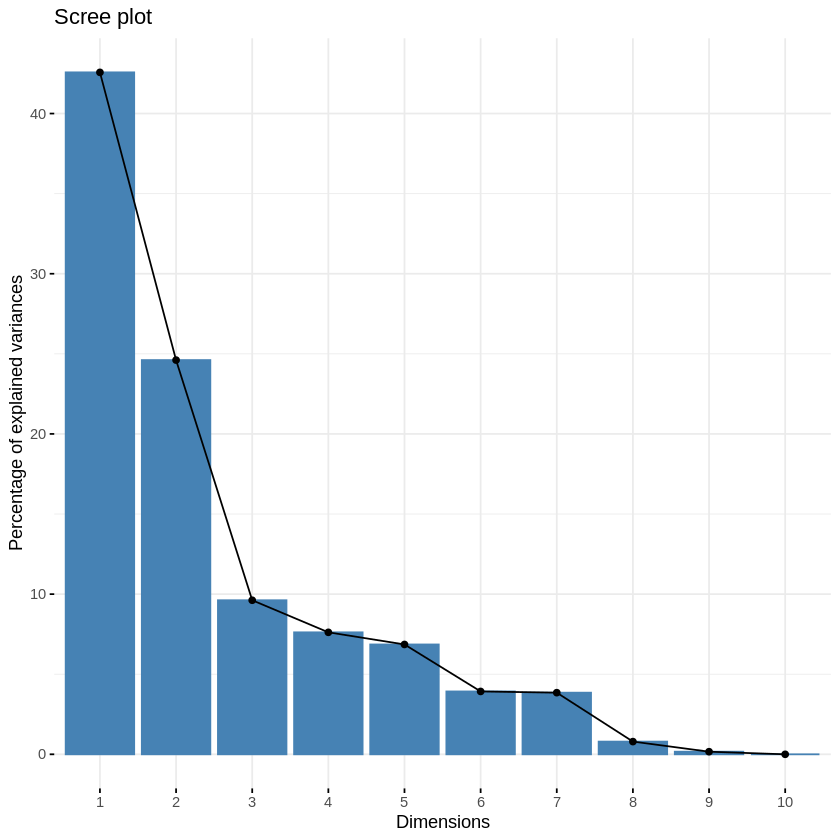

In [49]:
summary(pca)$importance

npc <- which(summary(pca)$importance[3,] >= 0.95) %>% first()
npc

fviz_eig(pca)

Eigenvectors

In [64]:
pca$rotation

PC1        PC2        PC3         PC4          PC5        
street.area     0.4084148 -0.1090425 -0.14810647 -0.274562570  0.23869335
street.pop     -0.2047378 -0.4970614 -0.12397055  0.005154789  0.07900849
rail.area       0.3209514 -0.2481710  0.29954640  0.425609892 -0.35337133
rail.pop       -0.1608032 -0.3313198  0.41055978  0.017961482  0.56647632
other.area      0.3659066 -0.1373008 -0.20139790 -0.252800994  0.40128251
other.pop      -0.1083863 -0.3536694 -0.55105706 -0.079616219 -0.38723763
building.area   0.4029353 -0.2418300  0.15856205  0.193659791 -0.14777408
building.pop   -0.1466593 -0.1879025  0.54793117 -0.640917313 -0.36603603
total.area      0.4239801 -0.2279944  0.07286454  0.084053977 -0.01478609
total.pop      -0.2111620 -0.5159629 -0.15053148 -0.041444427  0.01229594
BUILDING_RATIO  0.3294886  0.1172869 -0.08272808 -0.464557334 -0.15442289
               PC6           PC7         PC8           PC9          
street.area     0.0576597747 -0.05162478  0.7877648092  0.1901698588
street.pop      0.4074470291  0.31563993 -0.0215223175  0.0177149964
rail.area      -0.0537973817  0.04612509 -0.0450313346  0.6551790818
rail.pop       -0.6029572406  0.09897591 -0.0007676524  0.0028982790
other.area      0.1471173538 -0.39528691 -0.5631845705  0.2260105580
other.pop      -0.5567937968 -0.27853250  0.0183539802 -0.0109130757
building.area  -0.0006265548  0.01228931  0.0030111868 -0.6171622055
building.pop    0.1068662953 -0.29162365  0.0137971380 -0.0006662843
total.area      0.0350049979 -0.08531873 -0.0693705565 -0.3149964293
total.pop       0.2400359761  0.21799237 -0.0150084028  0.0137117129
BUILDING_RATIO -0.2495684501  0.71551040 -0.2327752162  0.0524720259
               PC10          PC11         
street.area     1.666816e-03  6.543672e-02
street.pop     -6.501399e-01  1.656048e-02
rail.area       1.473642e-03  5.785298e-02
rail.pop       -3.505285e-02  8.928728e-04
other.area      4.805255e-03  1.886471e-01
other.pop      -1.230825e-01  3.135180e-03
building.area   1.426045e-02  5.598438e-01
building.pop   -3.925799e-02  9.999867e-04
total.area     -2.042084e-02 -8.016918e-01
total.pop       7.474962e-01 -1.904036e-02
BUILDING_RATIO  5.551115e-17  1.804112e-16

Heatmap of loadings
- blue: positive loading
- red: negative loading
- black: no loading

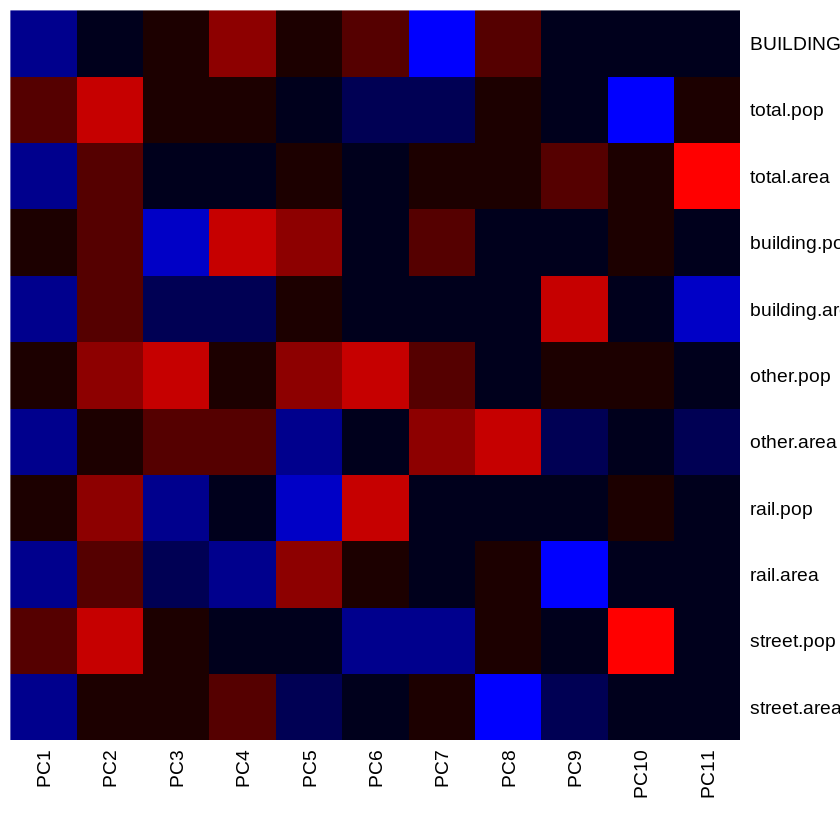

In [106]:
heatmap(pca$rotation, 
        scale = "none", 
        Rowv = NA, Colv = NA, 
        col=colorRampPalette(c("red", "black", "blue"))(10))

In [73]:
?heatmap


Eigenvectors for pairs of relevant PCs

Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomTextRepel() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomTextRepel() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


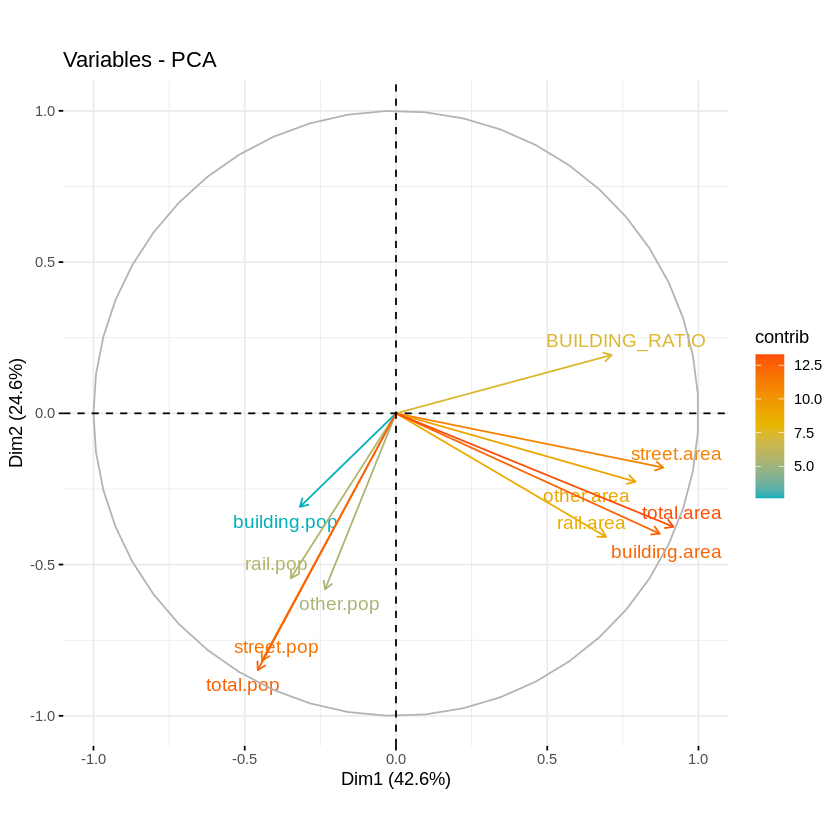

Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomTextRepel() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


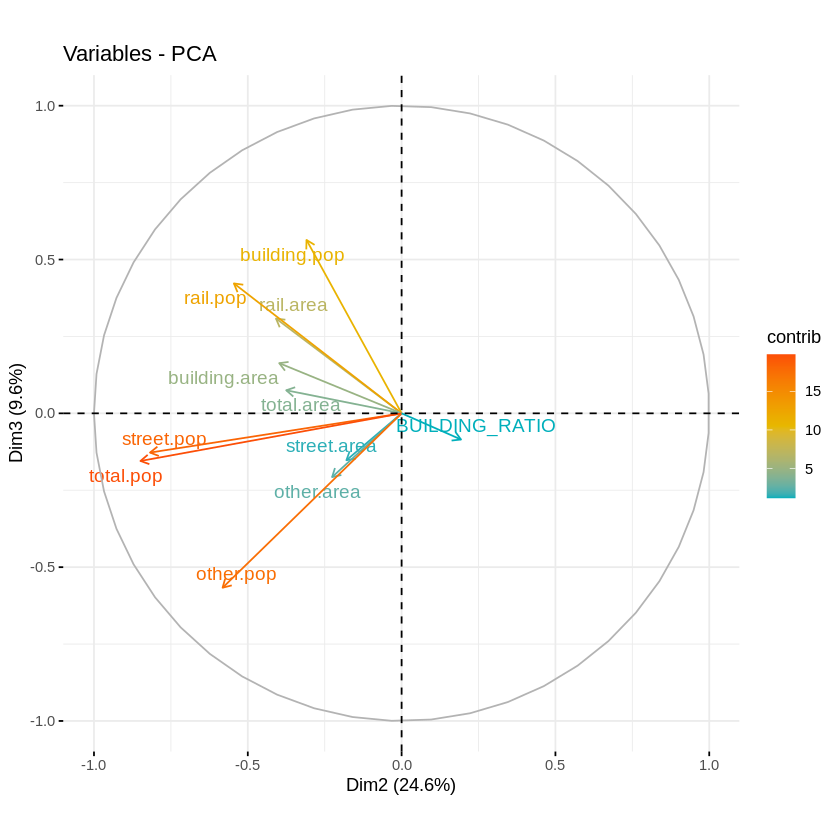

Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomTextRepel() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


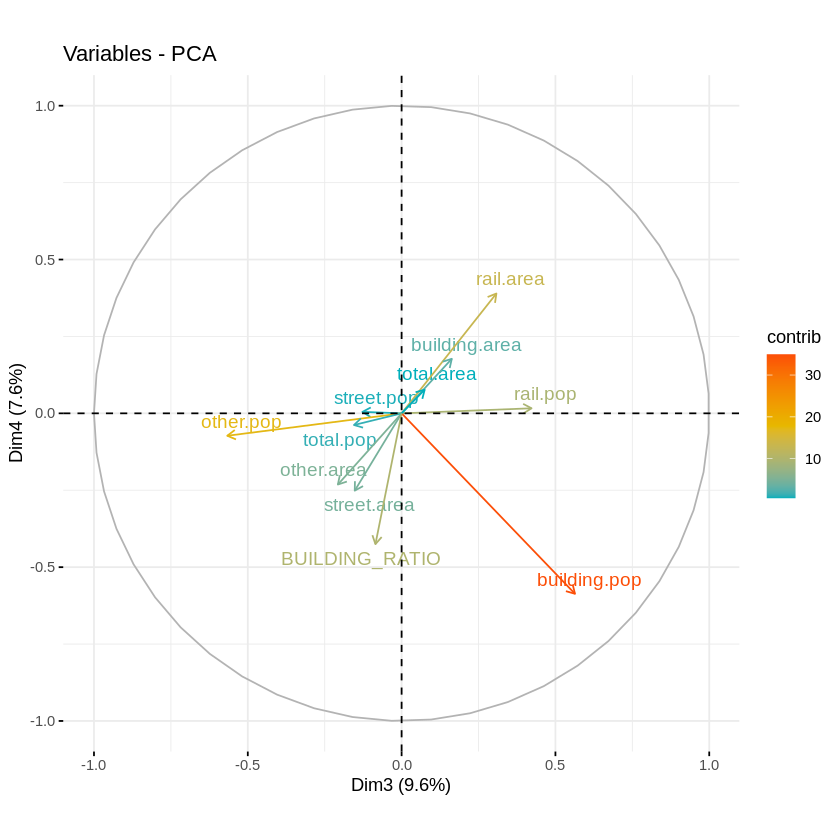

Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomTextRepel() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


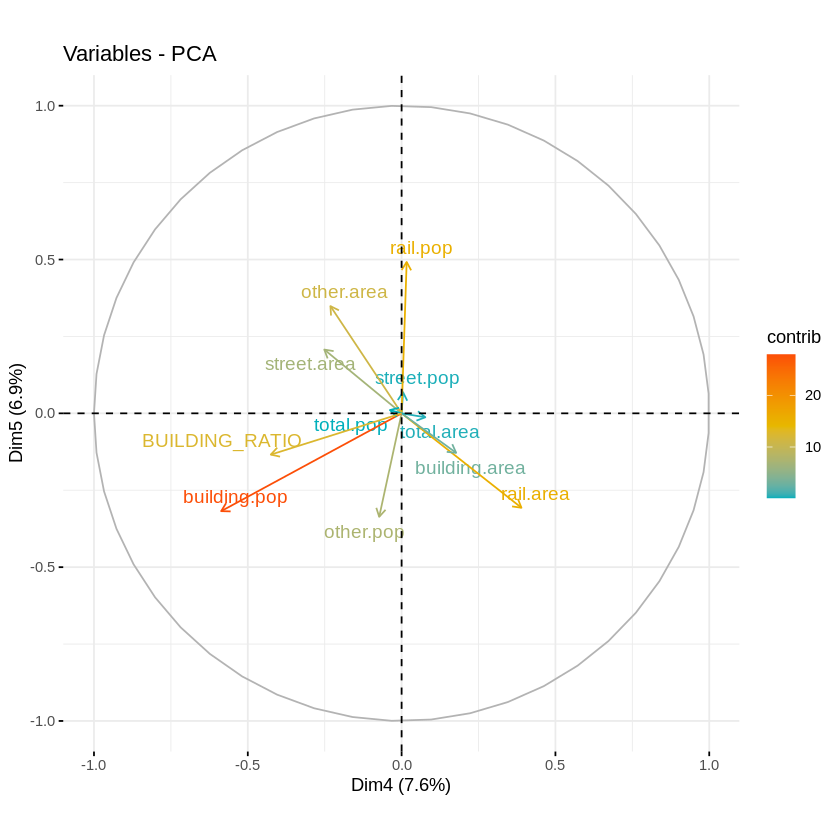

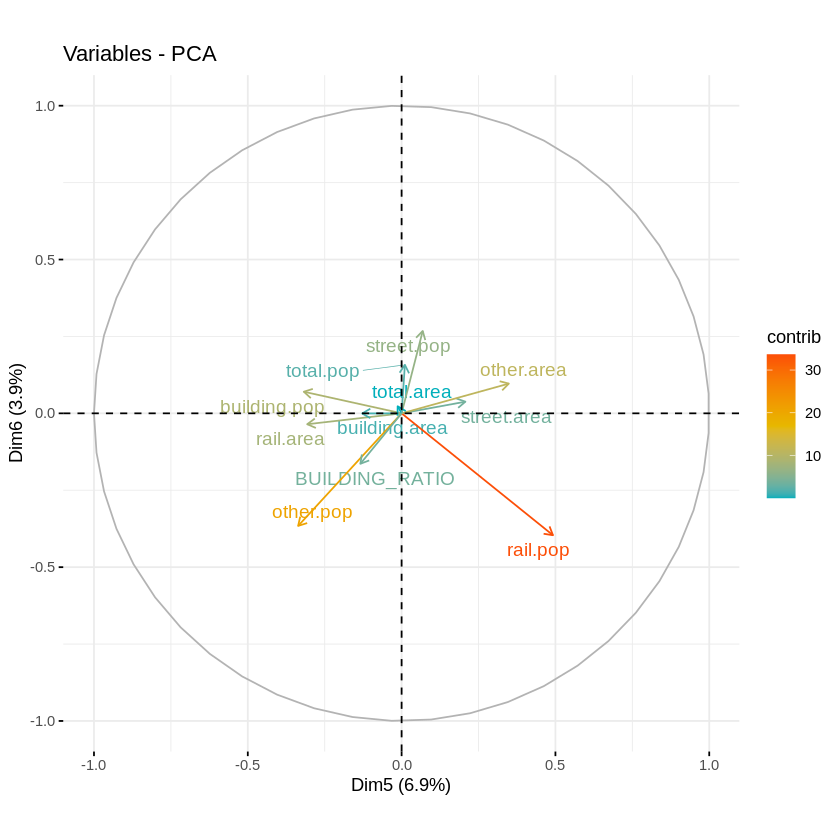

In [61]:
for (i in 2:npc){
    display(
        fviz_pca_var(pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE,     # Avoid text overlapping
             axes = c(i-1, i)
             )
    )
}